<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/notebooks/SML_application_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Welcome to this introduction to machine learning (ML). In this session we cover the following topics
1. Generalizating and valididating from ML models.
2. The Bias-Variance Trade-Off
3. Out-of-sample testing and cross-validation workflows
4. Implementing Ml workflows in the Python (Sklearn) ecosystem.

In [1]:
# loading essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set(style="darkgrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# The very basics:

## Regression problems

Let' do a brief example for a simple linear model. We generate some data, where $y$ is a linear function of $x$ plus some random error.

Here the idea is to get the model to figure out parameters that we intentionally set to generate the data. It is also a useful way of thinking about the relationship between inferential statistics / econometrics and machine learning.

In [2]:
np.random.seed(21)

beta0 = 15
beta1 = 0.3

In [3]:
x = np.random.uniform(0,100, 500)
y = beta0 + (beta1*x) + np.random.normal(0, 5, 500)

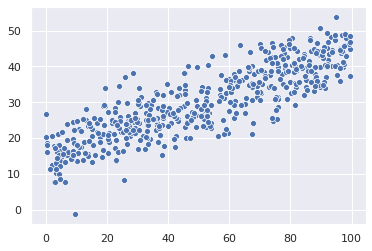

In [4]:
sns.scatterplot(x = x, y = y)

Now that we have generated some data we can use statsmodels to run a simple linear regression.
PS: Later we will not be using statsmodels as it isn't really a machine learning package. However, it is useful for this demo.

In [5]:
X = sm.add_constant(x)

mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.737    
Dependent Variable: y                AIC:                3042.5723
Date:               2020-09-20 13:01 BIC:                3051.0015
No. Observations:   500              Log-Likelihood:     -1519.3  
Df Model:           1                F-statistic:        1401.    
Df Residuals:       498              Prob (F-statistic): 7.86e-147
R-squared:          0.738            Scale:              25.617   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      15.1501     0.4609   32.8699   0.0000   14.2445   16.0556
x1          0.2918     0.0078   37.4254   0.0000    0.2765    0.3071
------------------------------------------------------------------
Omnibus:              1.174         Durbin-Watson:           1.898
Pro

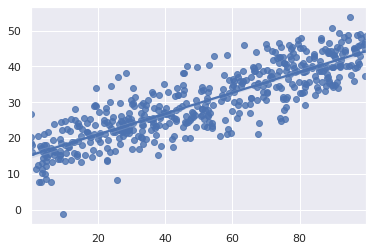

In [6]:
sns.regplot(x = x, y = y )


We see it got the underlying relationship somewhat correct. Keep in mind, its ability to discover it is also limited by the small sample, where small random errors dan bias the result.

We can now use `predict()` to predict y values due to the fitted model.



In [7]:
y_pred = res.predict(X)

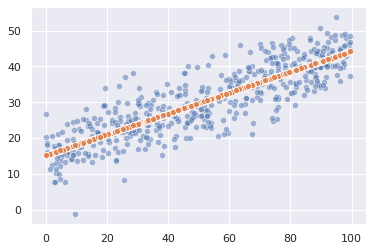

In [8]:
sns.scatterplot(x = x, y = y, alpha=0.5)
sns.scatterplot(x = x, y = y_pred)

It obviously predicts along th straight function line. Due to the random noise introduced, it is most of the time off a bit. Lets calculate the error term



In [9]:
error_reg = y - y_pred

In [10]:
np.mean(error_reg)

-4.760636329592672e-16


On average the error is very low. However, keep in mind positive and negative errors cancel each others out. Lets look at the RSME better.



In [11]:
np.sqrt(np.mean(error_reg**2))

5.051240204155663


However, we predicted on the data the model was fitted on. How would it fair on new data?



In [12]:
np.random.seed(42)

In [13]:
x_new = np.random.uniform(0,100, 500)
y_new = beta0 + (beta1*x_new) + np.random.normal(0, 5, 500)

In [14]:
X_new = sm.add_constant(x_new)

In [15]:
y_pred_new = res.predict(X_new)

In [16]:
error_reg_new = y_new - y_pred_new

In [17]:
np.sqrt(np.mean(error_reg_new**2))

5.061466857807731


## Classification problems

Ok, lets try the same with a binary class prediction. Lets create a random x and an associated binary y.



In [18]:
np.random.seed(21)

In [19]:
beta1 = 5

x = np.random.normal(0, 1, 500)
y = np.random.binomial(1, 1/(1+np.exp(-(beta1*x))))

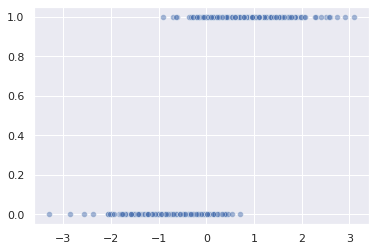

In [20]:
sns.scatterplot(x = x, y = y, alpha=0.5)


let's fit a logistic regression on that


In [21]:
X = sm.add_constant(x)

mod = sm.GLM(y, X, sm.families.Binomial())
res = mod.fit()

In [22]:
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            254.2953  
Link Function:      logit            BIC:            -2844.5795
Dependent Variable: y                Log-Likelihood: -125.15   
Date:               2020-09-20 13:01 LL-Null:        -346.43   
No. Observations:   500              Deviance:       250.30    
Df Model:           1                Pearson chi2:   362.      
Df Residuals:       498              Scale:          1.0000    
Method:             IRLS                                       
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const     0.0541     0.1609    0.3363   0.7366   -0.2613   0.3695
x1        4.6371     0.4403   10.5322   0.0000    3.7742   5.5000





We can again visualize it:



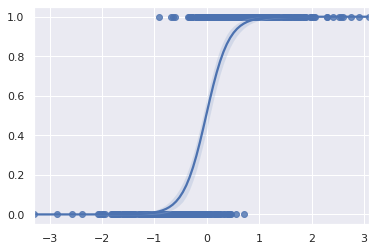

In [23]:
sns.regplot(x, y, logistic=True)


We can use this fitted model to predict the datapoints y-class. Here, we have the choice to either report the **predicted class** or the **predicted probability**. We do both.



In [24]:
y_pred = res.predict(X)
y_pred_class = np.round(y_pred)

In [25]:
data_class = pd.DataFrame({'x':x, 
                           'y':y, 
                           'predicted' : y_pred, 
                           'predicted_class' : y_pred_class})

In [26]:
data_class.head()

,x,y,predicted,predicted_class
0,-0.051964,0,0.453426,0.0
1,-0.111196,0,0.386630,0.0
2,1.041797,1,0.992498,1.0
3,-1.256739,0,0.003099,0.0
4,0.745388,1,0.970987,1.0


From here we can look into different ways to measure the performance of our trained model.

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
cm_log = confusion_matrix(y, y_pred_class)

In [29]:
cm_log

array([[217,  27],
       [ 28, 228]])

In [30]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febdc1ffcc0>)

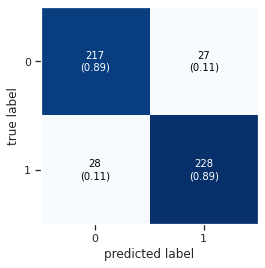

In [31]:
plot_confusion_matrix(conf_mat=cm_log,
                                show_absolute=True,
                                show_normed=True)

In [32]:
print(classification_report(y,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       244
           1       0.89      0.89      0.89       256

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



# SML workflows

Most elements of ML are usually performed using ```sklearn``` which offers a uniform API. New algorithms developed outside the ```sklearn``` framework will usually use the same established notation which makes it easy to switch to switch or use them in combination with e.g. tools for performance evaluation.


# ML case 1 (Regression, tabular data): Boston Housing Prices

## Data Description

We will load a standard dataset, the BostonHousing dataset. It comes as a dataframe with 506 observations on 14 features, the last one `medv` being the outcome:

* `crim`	per capita crime rate by town
* `zn`	proportion of residential land zoned for lots over 25,000 sq.ft
* `indus`	proportion of non-retail business acres per town
* `chas`	Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (deselected in this case)
* `nox`	nitric oxides concentration (parts per 110 million)
* `rm`	average number of rooms per dwelling
* `age`	proportion of owner-occupied units built prior to 1940
* `dis`	weighted distances to five Boston employment centres
* `rad`	index of accessibility to radial highways
* `tax`	full-value property-tax rate per USD 10,000
* `ptratio`	pupil-teacher ratio by town
* `b`	1000(B - 0.63)^2 where B is the proportion of blacks by town
* `lstat`	lower status of the population
* `medv`	median value of owner-occupied homes in USD 1000's (our outcome to predict)

Source: Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.

These data have been taken from the [UCI Repository Of Machine Learning Databases](ftp://ftp.ics.uci.edu/pub/machine-learning-databases)




In [33]:
from sklearn.datasets import load_boston

In [34]:
X, y = load_boston(return_X_y=True)

In [35]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
data = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])

In [37]:
data['y'] = load_boston()['target']

In [38]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



In this exercise, we will predict `medv` (median value of owner-occupied homes in USD). Such a model would in the real world be used to predict developments in housing prices, eg. to inform policy makers  or potential investors. In case I have only one target outcome, I prefer to name it as `y`. This simple naming convention helps to re-use code across datasets.

Let's take a look at the correlation matrix and the distributions of the variables.

In [39]:
corr = data.corr()

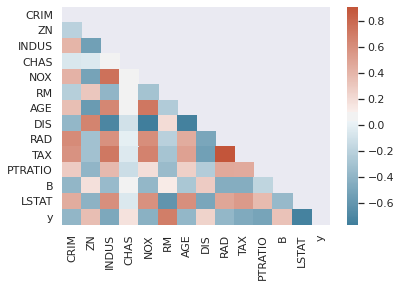

In [40]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.heatmap(corr,mask=mask, cmap=cmap)

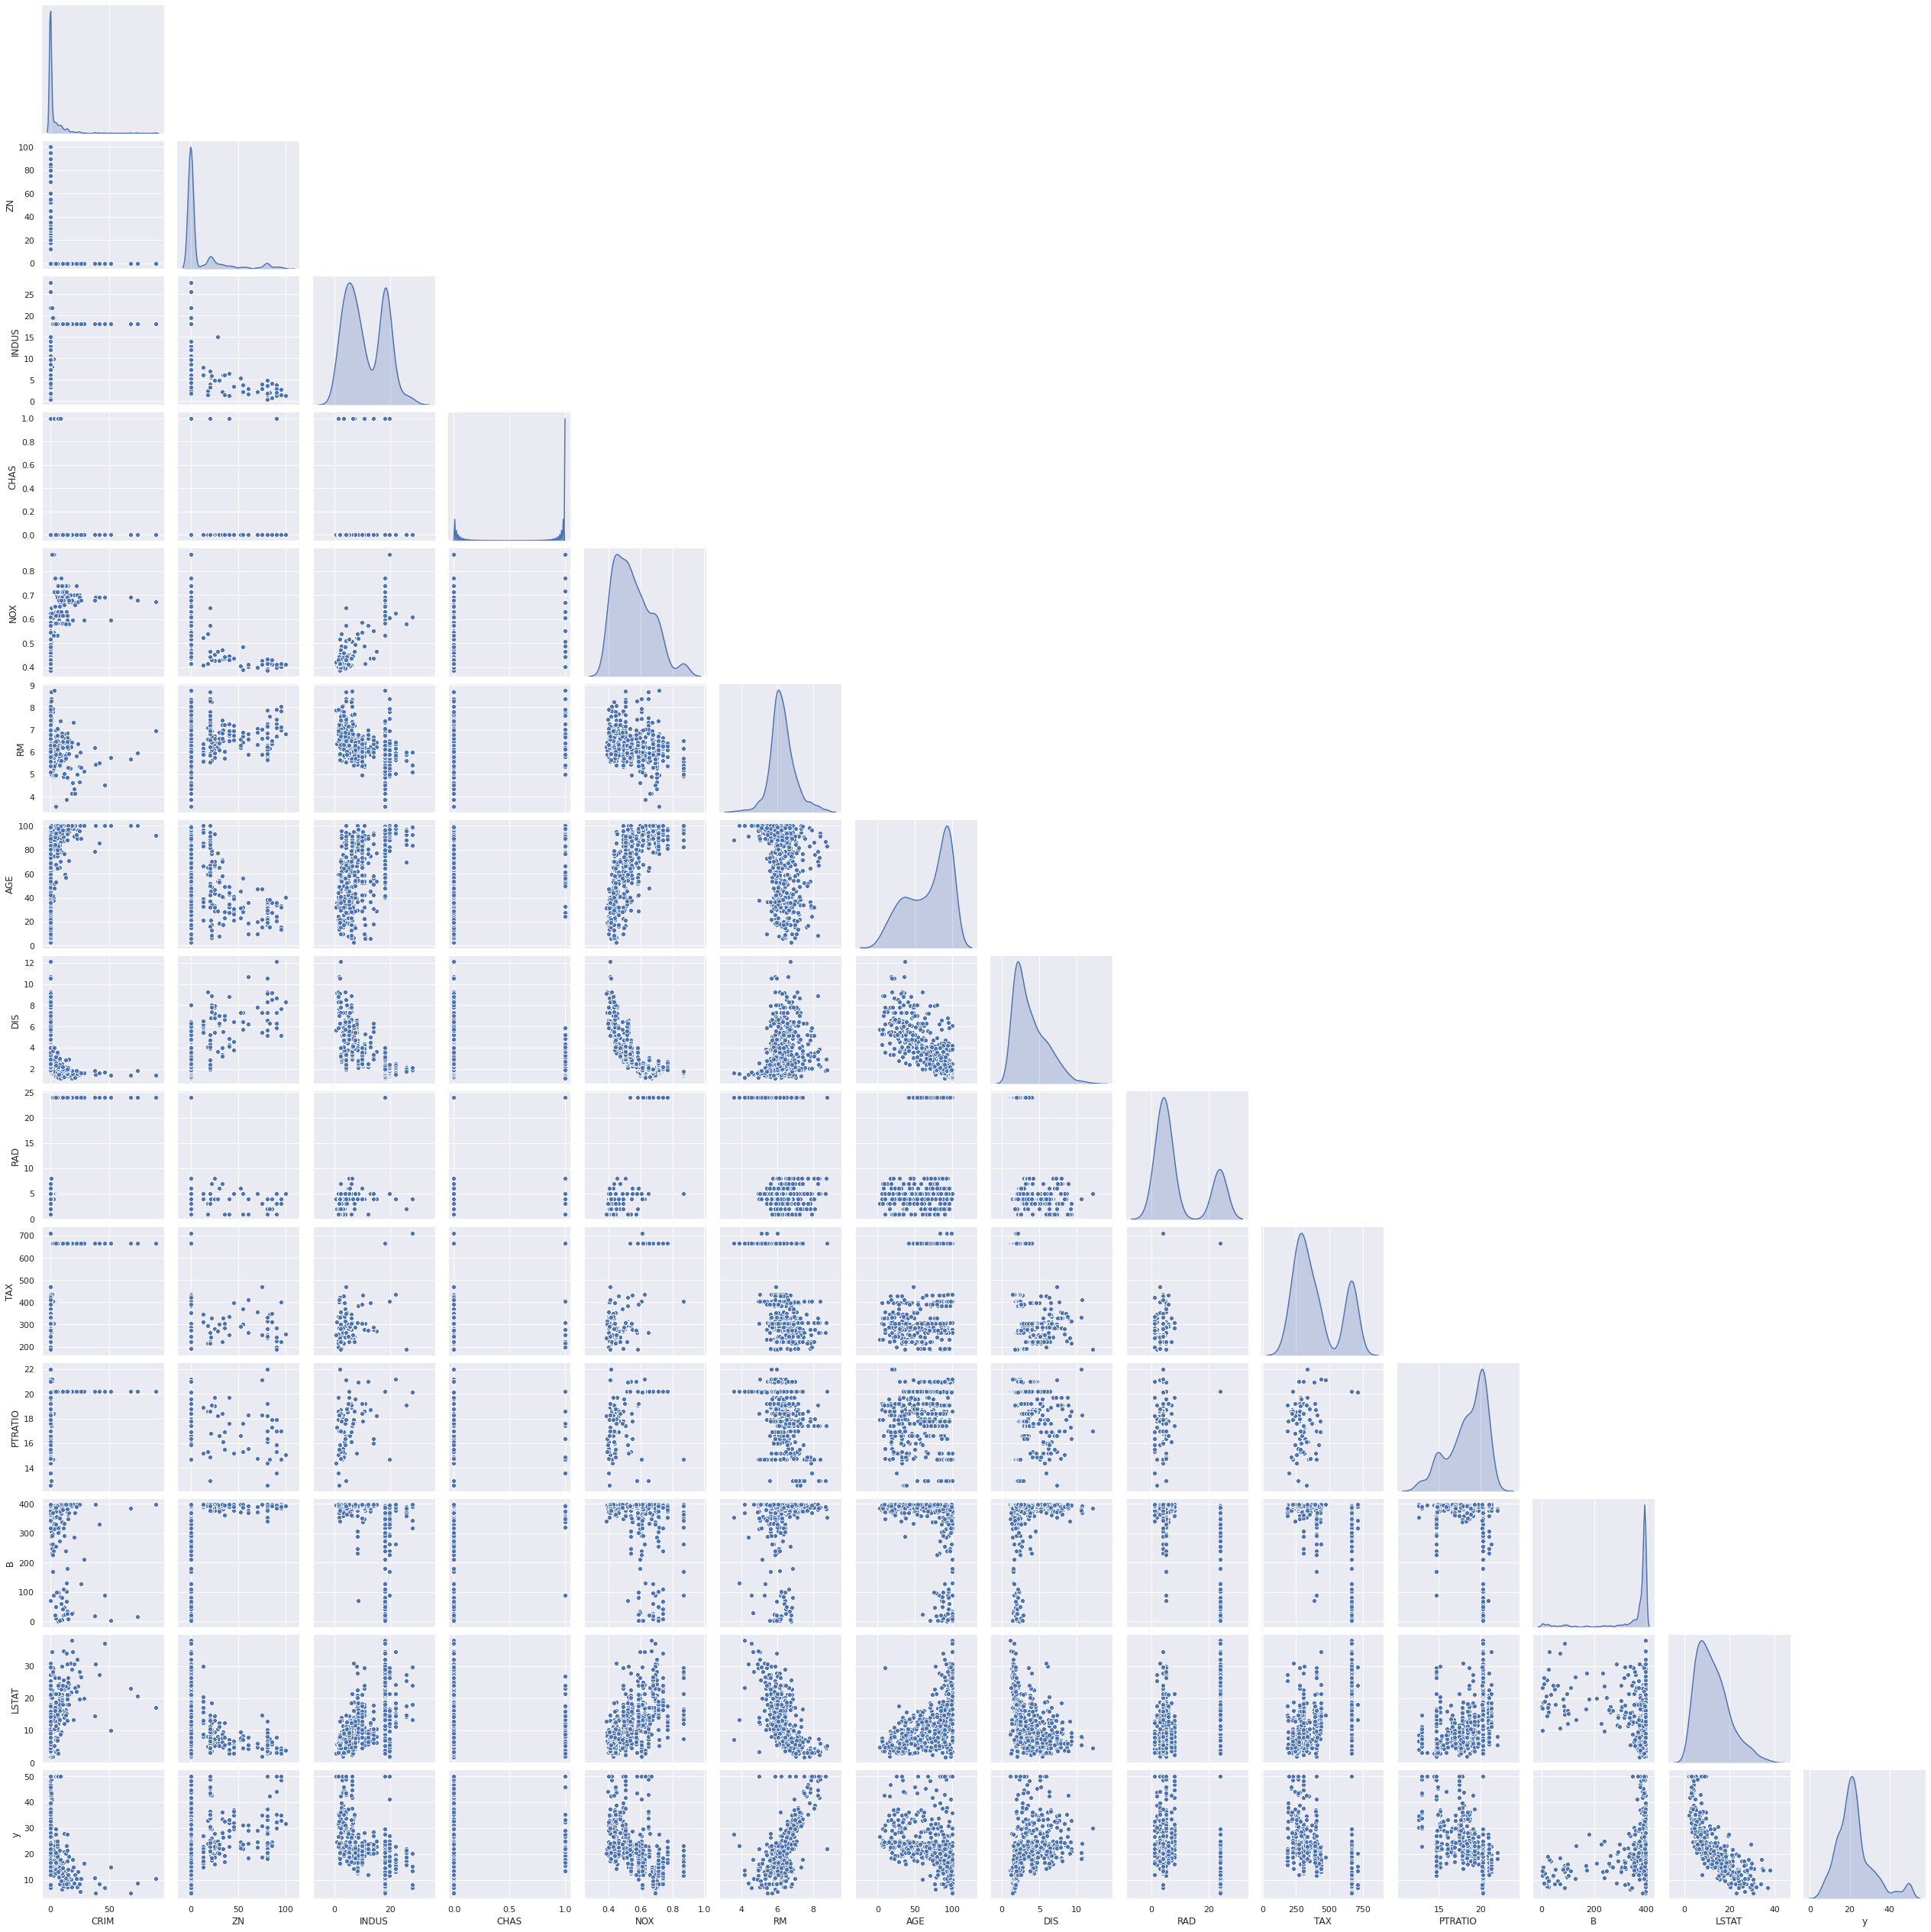

In [41]:
sns.pairplot(data, corner=True, diag_kind='kde')

We preprocess the data by standardising it and then we split into a train and test set using standard settings.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
X_scaled = StandardScaler().fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Here, we are going to try out 3 different models: 

1. OLS model (Baseline)
2. Elastic net (still parametric, but maybe advantage in feature selection)
3. Random forest (tree-based ensemble model)

There is no particular reason other than to demonstrate different models with increasing complexity and hyperparameter tuning options.

In [45]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [46]:
model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)

In [47]:
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model OLS 0.7194963188513838
Model EL 0.6796407977462917
Model RF 0.8716185270405332


Hyperparameter tuning is performed using 5-fold crossvalidation with ```GridSearchCV```

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

In [50]:
parameters_el = {'alpha':[0.1, 0.5, 1.0], 'l1_ratio':[0.1, 0.5, 0.75]}

In [51]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_el, parameters_el, scoring=scorer)

In [52]:
grid_fit = grid_obj.fit(X, y)

In [53]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
best_reg.score(X_test, y_test)

0.7019952036021002

In [55]:
model_rf = RandomForestRegressor()

In [56]:
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 50]}

In [57]:
# erform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_rf, parameters_rf, scoring=scorer)

In [58]:
grid_fit = grid_obj.fit(X, y)

In [59]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
best_reg.score(X_test, y_test)

0.8593092980069338

# Classification of penguins

In [60]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [61]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [62]:
penguins.dropna(inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [64]:
X = penguins.iloc[:,2:6]

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
# This is new: We encode a categorical variable. 

y = penguins.iloc[:, 0]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


Let's split the data and fit a simple logistic model

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="ovr") # since we have 3 classes
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
model.score(X_test, y_test)

0.9552238805970149

We can use the LabelEncoder to obtain the initial labels of the penguins to see how well the model performed

In [71]:
true_penguins = labelencoder_y.inverse_transform(y_test)

predicted_penguins = labelencoder_y.inverse_transform(model.predict(X_test))

In [74]:
df = pd.DataFrame({'true_penguins': true_penguins, 'predicted_penguins': predicted_penguins}) 

pd.crosstab(df.true_penguins, df.predicted_penguins)

predicted_penguins,Adelie,Chinstrap,Gentoo
true_penguins,,,
Adelie,28,0,0
Chinstrap,3,13,0
Gentoo,0,0,23


In [75]:
print(classification_report(true_penguins,predicted_penguins, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.81      0.90        16
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.96        67
   macro avg       0.97      0.94      0.95        67
weighted avg       0.96      0.96      0.95        67



In this case it is probably silly but this is how easy we can switch to a **non-sklearn algorithm**

In [76]:
# Let's use an advanded classifier algorithm
from xgboost import XGBClassifier

In [77]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
true_penguins = labelencoder_y.inverse_transform(y_test)

predicted_penguins = labelencoder_y.inverse_transform(model.predict(X_test))

print(classification_report(true_penguins,predicted_penguins, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



In [79]:
df = pd.DataFrame({'true_penguins': true_penguins, 'predicted_penguins': predicted_penguins}) 

pd.crosstab(df.true_penguins, df.predicted_penguins)

predicted_penguins,Adelie,Chinstrap,Gentoo
true_penguins,,,
Adelie,28,0,0
Chinstrap,1,15,0
Gentoo,0,0,23


In [80]:
model.score(X_test, y_test)

0.9850746268656716

Now, let's return to a quick example of a regression using the penguin data

In [81]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [82]:
y = penguins['culmen_length_mm']

In [83]:
X_dum = penguins.species_short.str.get_dummies()

In [84]:
X = pd.concat([penguins.iloc[:,4:6], X_dum], axis=1)

In [85]:
X.iloc[:,0:2] = StandardScaler().fit_transform(X.iloc[:,0:2])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [87]:
from xgboost import XGBRegressor

In [88]:
model_ols = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [89]:
model_ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
model_xgb.fit(X_train, y_train)

[13:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [92]:
model_ols.score(X_test, y_test)

0.8409142261469891

In [93]:
model_rf.score(X_test, y_test)

0.782848197477345

In [94]:
model_xgb.score(X_test, y_test)

0.8105875418200199

In [95]:
model_ols.score(X_train, y_train)

0.8073921106472661

In [96]:
model_rf.score(X_train, y_train)

0.9595626690530112

In [97]:
model_xgb.score(X_train, y_train)

0.8901182024671851

In [98]:
y_pred_rf = model_rf.predict(X_test)

In [99]:
y_pred_ols = model_ols.predict(X_test)

In [100]:
y_pred_xgb = model_xgb.predict(X_test)

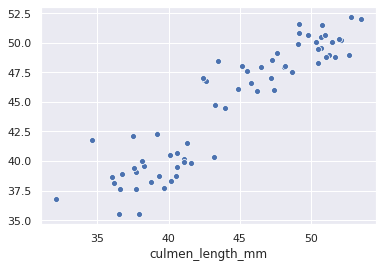

In [101]:
sns.scatterplot(y_test, y_pred_ols)

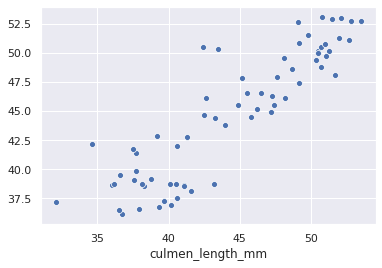

In [102]:
sns.scatterplot(y_test, y_pred_rf)

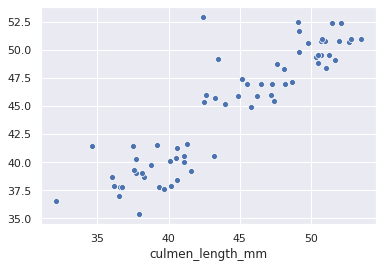

In [103]:
sns.scatterplot(y_test, y_pred_xgb)